In [2]:
# Import required packages
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import os

# Load in the data

dir = os.getcwd()
file_path = dir + "/data_base_model.csv" 
test_df = pd.read_csv(file_path)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
/var/folders/fs/g9ydf4hn48ng21n8dv53yt380000gn/T/ipykernel_13570/93088933.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
import os
import pandas as pd

# Script to combine final season data
directory = os.getcwd() + "/data-fourfactors-defense"

# Initialize a list to hold DataFrames
dfs = []

# Define a mapping of non-standard column names to standard ones
column_name_mapping = {
    'eFG_Pct': 'eFGPct',
    'RankeFG_Pct': 'RankeFGPct',
    'TO_Pct': 'TOPct',
    'RankTO_Pct': 'RankTOPct',
    'OR_Pct': 'ORPct',
    'RankOR_Pct': 'RankORPct',
    'FT_Rate': 'FTRate',
    'RankFT_Rate': 'RankFTRate'
}

# Loop through all files in the directory
first_file = True
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        print(filename)
        filepath = os.path.join(directory, filename)  # Use os.path.join for better path handling
        # Read each CSV file into a DataFrame
        data = pd.read_csv(filepath)

        # Standardize column names
        data.rename(columns=column_name_mapping, inplace=True)

        if first_file:
            # For the first file, remember the data types
            dtypes = data.dtypes
            first_file = False
        else:
            # For subsequent files, adjust the data types to match the first file
            for column in dtypes.index:
                if column in data.columns:  # Make sure the column exists in the DataFrame
                    data[column] = data[column].astype(dtypes[column])
                else:
                    # Handle missing columns in subsequent files
                    data[column] = pd.Series(dtype=dtypes[column])
        
        # Append the DataFrame to the list
        dfs.append(data)

# Concatenate all DataFrames in the list
combined_data = pd.concat(dfs, ignore_index=True)

# Add prefix 'de_' to all column names
combined_data.columns = ['de_' + col if col not in ['Season', 'TeamName'] else col for col in combined_data.columns]

# Drop any remaining columns that are completely empty
combined_data.dropna(axis=1, how='all', inplace=True)

# Save the combined DataFrame to a new CSV file
combined_data.to_csv("combined_fourfactors_defense.csv", index=False)

df1 = combined_data


defense23.csv
defense22.csv
defense21.csv
defense19.csv
defense24.csv
defense18.csv
defense16.csv
defense17.csv
defense15.csv
defense14.csv
defense10.csv
defense11.csv
defense13.csv
defense12.csv


In [4]:
import os
import pandas as pd

# Script to combine final season data
directory = os.getcwd() + "/data-fourfactors-offense"

# Initialize a list to hold DataFrames
dfs = []

# Define a mapping of non-standard column names to standard ones
column_name_mapping = {
    'eFG_Pct': 'eFGPct',
    'RankeFG_Pct': 'RankeFGPct',
    'TO_Pct': 'TOPct',
    'RankTO_Pct': 'RankTOPct',
    'OR_Pct': 'ORPct',
    'RankOR_Pct': 'RankORPct',
    'FT_Rate': 'FTRate',
    'RankFT_Rate': 'RankFTRate'
}

# Loop through all files in the directory
first_file = True
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        filepath = os.path.join(directory, filename)  # Use os.path.join for better path handling
        # Read each CSV file into a DataFrame
        data = pd.read_csv(filepath)

        # Standardize column names
        data.rename(columns=column_name_mapping, inplace=True)

        if first_file:
            # For the first file, remember the data types
            dtypes = data.dtypes
            first_file = False
        else:
            # For subsequent files, adjust the data types to match the first file
            for column in dtypes.index:
                if column in data.columns:  # Make sure the column exists in the DataFrame
                    data[column] = data[column].astype(dtypes[column])
                else:
                    # Handle missing columns in subsequent files
                    data[column] = pd.Series(dtype=dtypes[column])
        
        # Append the DataFrame to the list
        dfs.append(data)

# Concatenate all DataFrames in the list
combined_data = pd.concat(dfs, ignore_index=True)

# Add prefix 'de_' to all column names
combined_data.columns = ['o_' + col if col not in ['Season', 'TeamName'] else col for col in combined_data.columns]

# Drop any remaining columns that are completely empty
combined_data.dropna(axis=1, how='all', inplace=True)

# Save the combined DataFrame to a new CSV file
combined_data.to_csv("combined_fourfactors_offense.csv", index=False)

df2 = combined_data

In [5]:
import os
import pandas as pd

# Specify the directory containing the CSV files
directory = os.getcwd() + "/data-scoring-stats"

# Initialize an empty list to store the DataFrames
dataframes = []

# Loop through all files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):  # Check for CSV files
        # Construct the full file path
        file_path = os.path.join(directory, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Standardize column names by removing quotes
        df.columns = df.columns.str.replace('"', '').str.strip()
        
        # Append the DataFrame to the list
        dataframes.append(df)

# Concatenate all the DataFrames in the list into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv("combined_scoring.csv", index=False)



In [6]:
combined_four_factors = pd.merge(df1, df2, on=['TeamName', 'Season'], how='outer')

In [7]:
combined_df = pd.merge(combined_four_factors, test_df, on=['TeamName', 'Season'], how='outer')
combined_df.drop(columns=['Unnamed: 16'], inplace=True)
combined_df.to_csv("test_og.csv", index=False)


In [8]:
dir = os.getcwd()
file_path = dir + "/combined_scoring2.csv" 
test_df2 = pd.read_csv(file_path)

In [9]:
new_combined_df = pd.merge(combined_df, test_df2, on=['TeamName', 'Season'], how='outer')

sorted_df = new_combined_df.sort_values(by=['Season', 'TeamName'], ascending=[False, True])
sorted_df.to_csv("FINAL_DATA.csv", index=False)



In [10]:
dir = os.getcwd()
file_path = dir + "/cbb.csv" 
test_df3 = pd.read_csv(file_path)

test_df3.rename(columns={'TEAM': 'TeamName'}, inplace=True)
test_df3.rename(columns={'YEAR': 'Season'}, inplace=True)
test_df3.columns



Index(['TeamName', 'CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O',
       'EFG_D', 'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D',
       '3P_O', '3P_D', 'ADJ_T', 'WAB', 'POSTSEASON', 'SEED', 'Season'],
      dtype='object')

In [11]:
new_combined_df2 = pd.merge(sorted_df, test_df3, on=['TeamName', 'Season'], how='outer')

sorted_df2 = new_combined_df2.sort_values(by=['Season', 'TeamName'], ascending=[False, True])



In [12]:
dir = os.getcwd()
file_path = dir + "/combined_pt.csv" 
df_pt = pd.read_csv(file_path)

new_df = sorted_df2[~sorted_df2['Season'].isin([2010, 2011, 2012, 2024])]
test_df4 = new_df

new_df = new_df.drop(['de_RankeFGPct', 'o_RankTOPct', 'de_RankTOPct', 'de_RankORPct',
                       'de_RankFTRate', 'o_RankeFGPct', 'o_RankORPct', 'o_RankFTRate', 'RankTempo', 'RankAdjTempo',
                         'RankAdjOE', 'RankOE', 'RankAdjOE', 'RankDE', 'RankAdjDE', 'RankAdjEM', 'RankOff_1', 'RankOff_2', 'RankOff_3',
                           'RankDef_1', 'RankDef_2', 'RankDef_3', 'de_eFGPct', 'EFG_D', 'TOR', 'TORD', 'EFG_O','ADJ_T', 'ADJDE', 'ADJOE'
                           , 'FTRD', 'FTR', 'DRB', 'ORB', 'BARTHAG'], axis=1)

new_df = pd.merge(new_df, df_pt[['Season', 'TeamName', 'seed']], on=['Season', 'TeamName'], how='left')



print(new_df['Season'].unique())
# new_df = new_df.dropna(subset=['SEED', 'seed'])
new_df = new_df[new_df['SEED'].notna() | new_df['seed'].notna()]


new_df.to_csv("test_final.csv", index=False)


[2023 2022 2021 2019 2018 2017 2016 2015 2014 2013]


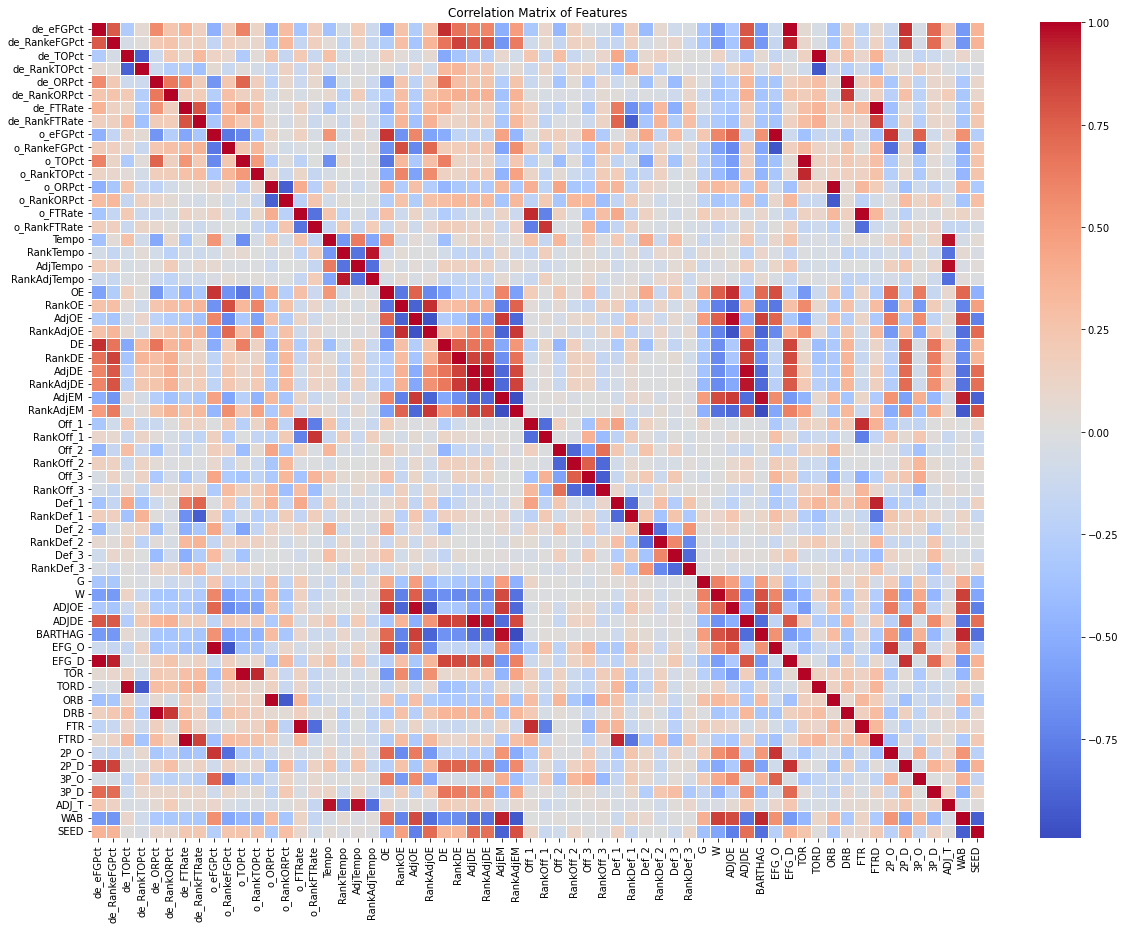

In [13]:
from sklearn.preprocessing import StandardScaler

# Extracting numerical features, excluding 'Season' as it's more of an identifier than a feature
numerical_features = test_df4.select_dtypes(include=['float64', 'int64']).drop(['Season'], axis=1)

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

# Creating a new DataFrame for the scaled features
scaled_features_df = pd.DataFrame(scaled_features, columns=numerical_features.columns)

# Computing the correlation matrix
correlation_matrix = scaled_features_df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(20, 15))
# Here, annot=True to show the correlation values. Multiply by 100 and format to display as percentage.
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()

In [14]:
dir = os.getcwd()
file_path = dir + "/FINALFINAL_DATA.csv" 
final = pd.read_csv(file_path)

final = final.drop(['seed', 'Off_1', 'Def_1', 'AdjOE', 'AdjTempo', '2P_O'], axis=1)
# Assuming 'data' is your DataFrame
unique_teams = []
for index, row in final.iterrows():
    if (row['Season'] == 2016):
        if row['TeamName'] not in unique_teams:
            unique_teams.append(row['TeamName'])
        else:
            final = final.drop(index)

print(final.columns)


final.to_csv("finaldata_v3_2023.csv", index=False)



Index(['Season', 'TeamName', 'de_TOPct', 'de_ORPct', 'de_FTRate', 'o_eFGPct',
       'o_TOPct', 'o_ORPct', 'o_FTRate', 'Tempo', 'OE', 'DE', 'AdjDE', 'AdjEM',
       'Off_2', 'Off_3', 'Def_2', 'Def_3', 'CONF', 'G', 'W', '2P_D', '3P_O',
       '3P_D', 'WAB', 'POSTSEASON', 'SEED'],
      dtype='object')
